# Convolutional Neural Networks

<img style="float: left;" src='CNN1.png' width="500" height="400">


In [ ]:
# Typical convolutional architecture
# Different convolutional layers followed by optional activation functions followed by pooling layers
# Used to automatically learn features from the images
# One more more fully connected layers at the end for the actual classification task

<img style="float: left;" src='CNN2.png' width="500" height="400">

In [1]:
# Work by applying a filter kernel to the image

<img style="float: left;" src='CNN3.png' width="500" height="400">

In [2]:
# Filter is applied to the first position of the image
# Output value computed by multiplying and summing up all the values
# Slide filter to the next position and repeat
# Resulting image may be smaller size because filter doesn't fit on the corners
# ^ can be avoided by a technique called "padding"

<img style="float: left;" src='CNN4.png' width="500" height="400">

In [ ]:
# Max Pooling sued to downsize an image by applying a maximum filter to subregions
# Reduces computational cost by reducing number of parameters the model has to learn
# Helps to avoid overfitting by providing an abstracted form of the input

<img style="float: left;" src='CNN5.png' width="500" height="400">

# The Code

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# Device
device = torch.device('cude' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
num_epochs = 4
batch_size = 4
learning_rate = 0.001

In [20]:
# dataset has PILImage images of range [0,1].
# We transform them to Tensors of normalized range [-1,1]
transform = transforms.Compose(
            [transforms.ToTensor(),
             transforms.Normalize((0.5, 0.5, 0.5,), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


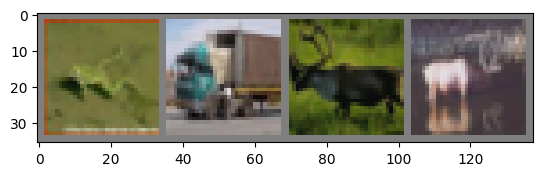

torch.Size([4, 3, 32, 32])
torch.Size([4, 6, 28, 28])
torch.Size([4, 6, 14, 14])
torch.Size([4, 16, 10, 10])
torch.Size([4, 16, 5, 5])


In [25]:
# Show images first 

num_epochs = 0
batch_size = 4
learning_rate = 0.001

def imshow(img):
    img = img / 2 + 0.5 #unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

conv1 = nn.Conv2d(3, 6, 5)
pool = nn.MaxPool2d(2, 2)
conv2 = nn.Conv2d(6, 16, 5)
print(images.shape)

x = conv1(images)
print(x.shape)
x = pool(x)
print(x.shape)
x = conv2(x)
print(x.shape)
x = pool(x)
print(x.shape) #torch.Size([4, 16, 5, 5])
# 16x5x5 comes from here

# reset
num_epochs = 4
batch_size = 4
learning_rate = 0.001

In [35]:
# implement cov net
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5) # in order to pass it to the first fully connected layer, we must flatten it
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [36]:
model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss() #multiclass
optimizer = torch. optim.SGD(model.parameters(), lr=learning_rate)

In [37]:
%%time
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # original shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 2000 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
            
print('Finished Training')

Epoch [1/4], Step [2000/12500], Loss: 2.3526
Epoch [1/4], Step [4000/12500], Loss: 2.3047
Epoch [1/4], Step [6000/12500], Loss: 2.2856
Epoch [1/4], Step [8000/12500], Loss: 2.2747
Epoch [1/4], Step [10000/12500], Loss: 2.2875
Epoch [1/4], Step [12000/12500], Loss: 2.2920
Epoch [2/4], Step [2000/12500], Loss: 2.2867
Epoch [2/4], Step [4000/12500], Loss: 1.9846
Epoch [2/4], Step [6000/12500], Loss: 2.1217
Epoch [2/4], Step [8000/12500], Loss: 2.0565
Epoch [2/4], Step [10000/12500], Loss: 2.1022
Epoch [2/4], Step [12000/12500], Loss: 2.1817
Epoch [3/4], Step [2000/12500], Loss: 2.1370
Epoch [3/4], Step [4000/12500], Loss: 2.0192
Epoch [3/4], Step [6000/12500], Loss: 1.8348
Epoch [3/4], Step [8000/12500], Loss: 2.2730
Epoch [3/4], Step [10000/12500], Loss: 1.7787
Epoch [3/4], Step [12000/12500], Loss: 2.1420
Epoch [4/4], Step [2000/12500], Loss: 1.3956
Epoch [4/4], Step [4000/12500], Loss: 1.2469
Epoch [4/4], Step [6000/12500], Loss: 2.0222
Epoch [4/4], Step [8000/12500], Loss: 0.9932
Epoc

In [38]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value, index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1
        
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc}%')
    
    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc}%')

Accuracy of the network: 44.86%
Accuracy of plane: 25.9%
Accuracy of car: 61.6%
Accuracy of bird: 34.4%
Accuracy of cat: 38.1%
Accuracy of deer: 25.5%
Accuracy of dog: 34.9%
Accuracy of frog: 61.9%
Accuracy of horse: 45.7%
Accuracy of ship: 70.6%
Accuracy of truck: 50.0%
